## Open dataのexposure計算
2024.11.01
Open dataに入っているMXSの照射中のデータをxselectで抜いていたが、それだとexposureを間違えるため再計算する。
どこのGTIにMXS照射中の時間が含まれているか確認して、その時間を抜いてexposureを計算した。

### 計算結果
元々のexposure           : 23572.6783762872 sec,  
GTI 7, 8を抜いたexposure : 18485.6783762872 sec

### 取り扱い
binning後のmerged_b1.piのspectrumのexposureを上記の値に書き換える。
今回は/OBF../のcenterの値のみを書き換えたので、outer使う時は同様に処理する。

Filename: /Volumes/SUNDISK_SSD/PKS_XRISM/000112000/resolve/event_cl/xa000112000rsl_p0px1000_cl.evt.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  EVENTS        1 BinTableHDU    770   58218R x 54C   [1D, 1D, 1D, 1J, 1B, 1B, 1B, 1B, 1J, 1J, 1B, 1J, 1B, 2A, 1B, 1B, 1J, 1X, 1X, 1I, 1X, 1I, 1B, 1B, 1B, 1J, 1B, 1I, 1B, 1J, 1I, 1I, 1D, 1D, 1B, 1B, 1B, 1B, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1J, 1J, 1J, 1I, 16X, 32X, I, J, J]   
  2  GTI           1 BinTableHDU    202   12R x 2C   [D, D]   
Add Time : 2387.0 sec
All Exposure Time : 23572.678376287222 sec
Real Exposure Time : 20872.678376287222 sec


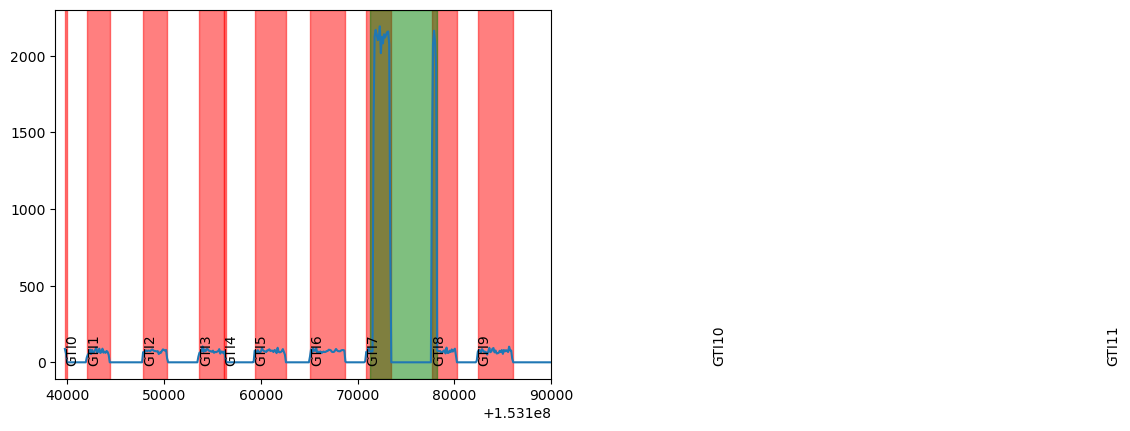

In [35]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
file = '/Volumes/SUNDISK_SSD/PKS_XRISM/000112000/resolve/event_cl/xa000112000rsl_p0px1000_cl.evt.gz'
hdul = fits.open(file)
hdul.info()
data = hdul['EVENTS'].data
GTI = hdul['GTI'].data
start = GTI['START']
stop = GTI['STOP']

time = data['TIME']
gti_sum_all = 0
gti_sum_real = 0
count = np.histogram(time, bins=1000)
plt.plot(count[1][:-1], count[0])
for i in range(len(start)):
    plt.axvspan(start[i], stop[i], color='red', alpha=0.5)
    plt.text(start[i], 0, 'GTI'+str(i), rotation=90)
    if i == 7 or i == 8:
        gti_sum_all += stop[i] - start[i]
    else:
        gti_sum_all += stop[i] - start[i]
        gti_sum_real += stop[i] - start[i]
#plt.xlim(1.5317e+8, 1.53185e+08)
plt.xlim(np.min(start)-1000, 1.5319e+8)
t_div_start = 153171242
t_div_stop = 153178242
plt.axvspan(153171242, 153178242, color='green', alpha=0.5)
dive_time = t_div_stop - t_div_start
gti_7_8 = stop[8] - start[7]
add_time = gti_7_8 - dive_time
print(f'Add Time : {add_time} sec')
gti_sum_real += add_time
print(f'All Exposure Time : {gti_sum_all} sec')
print(f'Real Exposure Time : {gti_sum_real} sec')